In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('viewing_sessions.csv')

In [3]:
print(df.shape)

(222785, 8)


In [4]:
print(df.head(10))

  session_id user_id content_id  watch_date  watch_duration_minutes  \
0    S000001   U0001       S001  2024-02-16                       9   
1    S000002   U0001       M110  2024-08-06                      30   
2    S000003   U0001       S005  2024-03-20                      18   
3    S000004   U0001       M105  2024-02-24                      77   
4    S000005   U0001       M148  2024-08-18                      47   
5    S000006   U0001       M015  2024-01-08                      59   
6    S000007   U0001       M038  2024-05-26                     101   
7    S000008   U0001       M043  2024-05-17                     118   
8    S000009   U0001       S024  2024-08-25                      14   
9    S000010   U0001       M021  2024-07-20                     109   

   completion_percentage device_type quality_level  
0                   18.8     Desktop            4K  
1                   23.6    Smart TV            SD  
2                   65.3     Desktop            4K  
3     

In [5]:
#Unique values of the "user_id" column and their total count for each
df["user_id"].value_counts()


user_id
U1570    104
U0290    104
U3477    104
U0759    104
U1685    104
        ... 
U2727      8
U2926      8
U2912      8
U1085      8
U4935      8
Name: count, Length: 5000, dtype: int64

In [6]:
#Unique values of the "content_id" column and their total count for each.
df["content_id"].value_counts()


content_id
S040    1321
M068    1320
S057    1307
M031    1306
M176    1304
        ... 
M187     516
M013     510
M161     507
S054     498
M195     490
Name: count, Length: 300, dtype: int64

In [7]:
#Unique values of the "device_type" column and their total count for each
df["device_type"].value_counts()


device_type
Smart TV          79803
Mobile            69847
Desktop           31329
Tablet            31287
Gaming Console    10519
Name: count, dtype: int64

In [8]:
#Unique values of the "quality_level" column and their total count for each
df["quality_level"].value_counts()


quality_level
HD    109286
4K     62342
SD     51157
Name: count, dtype: int64

In [9]:
# Info about Dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222785 entries, 0 to 222784
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              222785 non-null  object 
 1   user_id                 222785 non-null  object 
 2   content_id              222785 non-null  object 
 3   watch_date              222785 non-null  object 
 4   watch_duration_minutes  222785 non-null  int64  
 5   completion_percentage   222785 non-null  float64
 6   device_type             222785 non-null  object 
 7   quality_level           222785 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.6+ MB
None


### 2\. Handling missing values

In [10]:
# Count the number of missing values by column
print(df.isnull().sum())

session_id                0
user_id                   0
content_id                0
watch_date                0
watch_duration_minutes    0
completion_percentage     0
device_type               0
quality_level             0
dtype: int64


### 3\. Dropping duplicate rows

In [11]:
# Count the number of duplicate rows
print(df.duplicated().sum())


0


### Central tendency

In [12]:
# Mean
df[["watch_duration_minutes", "completion_percentage"]].mean()


watch_duration_minutes    78.907871
completion_percentage     78.384990
dtype: float64

In [13]:
# Median
df[["watch_duration_minutes", "completion_percentage"]].median()


watch_duration_minutes    79.0
completion_percentage     84.5
dtype: float64

In [14]:
# Mode
df[["watch_duration_minutes", "completion_percentage"]].mode()


,watch_duration_minutes,completion_percentage
0,23,100.0


### Dispersion measures calculation

In [15]:
# Rango (max - min)
df[["watch_duration_minutes", "completion_percentage"]].max() - df[["watch_duration_minutes", "completion_percentage"]].min()


watch_duration_minutes    178.0
completion_percentage      90.0
dtype: float64

In [16]:
# Varianza
df[["watch_duration_minutes", "completion_percentage"]].var()


watch_duration_minutes    2025.638780
completion_percentage      460.649707
dtype: float64

In [17]:
# Desviación estándar
df[["watch_duration_minutes", "completion_percentage"]].std()


watch_duration_minutes    45.007097
completion_percentage     21.462752
dtype: float64

In [18]:
# Coeficiente de variación
df[["watch_duration_minutes", "completion_percentage"]].std() / df[["watch_duration_minutes", "completion_percentage"]].mean()


watch_duration_minutes    0.570375
completion_percentage     0.273812
dtype: float64

In [19]:
# Percentiles
df[["watch_duration_minutes", "completion_percentage"]].quantile([0.25, 0.5, 0.75])

,watch_duration_minutes,completion_percentage
0.25,37.0,66.3
0.50,79.0,84.5
0.75,115.0,96.0


In [20]:
# IQR (Q3 - Q1)
Q1 = df[["watch_duration_minutes", "completion_percentage"]].quantile(0.25)
Q3 = df[["watch_duration_minutes", "completion_percentage"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


watch_duration_minutes    78.0
completion_percentage     29.7
dtype: float64


### Distribution analysis of key variables

##### watch_duration_minutes column

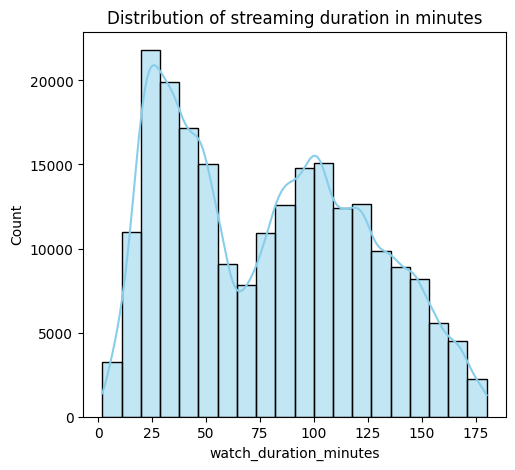

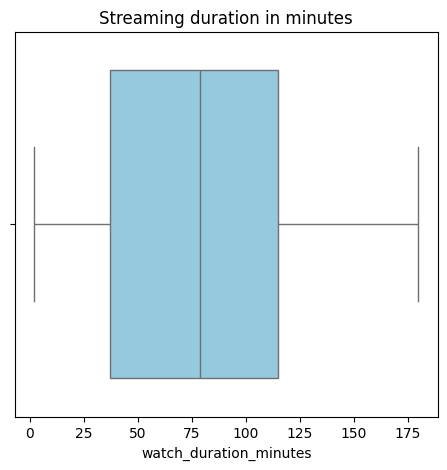

In [21]:
# Histograms to see distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['watch_duration_minutes'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of streaming duration in minutes")

plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['watch_duration_minutes'], color="skyblue")
plt.title("Streaming duration in minutes")

plt.show()

##### completion_percentage column

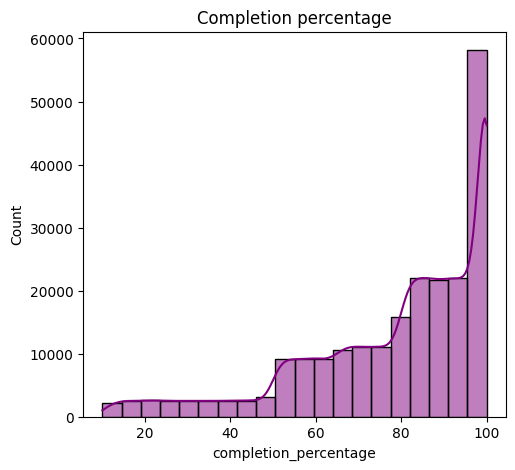

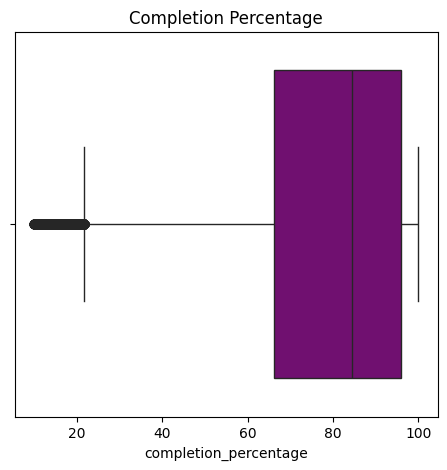

In [22]:
# Histograms to see distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df['completion_percentage'], bins=20, kde=True, color="purple")
plt.title("Completion percentage")

plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df['completion_percentage'], color="purple")
plt.title("Completion Percentage")

plt.show()

### Outliers

We chose to separate the outliers from the "viewing.csv" dataframe, creating one dataframe with all the outliers and another without them. This was done to avoid deleting them, as they might provide valuable insight into the behavior of that part of the sample.

### Calculate outliers with the "completion_percentage" column.

In [23]:
# Calculate Q1 (25%) and Q3 (75%)
Q1 = df["completion_percentage"].quantile(0.25)
Q3 = df["completion_percentage"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Filter the outliers
outliers = df[(df["completion_percentage"] < lower_bound) |
              (df["completion_percentage"] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
print(outliers[["session_id","content_id", "watch_duration_minutes", "completion_percentage"]].head(12))

Lower bound: 21.749999999999993
Upper bound: 140.55
Number of outliers: 6182
    session_id content_id  watch_duration_minutes  completion_percentage
0      S000001       S001                       9                   18.8
51     S000052       M198                      19                   20.5
84     S000085       M188                      19                   17.3
91     S000092       S097                       6                   16.3
139    S000140       M150                      16                   13.9
143    S000144       S018                       5                   14.9
211    S000212       S033                       4                   15.6
234    S000235       M025                      22                   14.0
235    S000236       M073                      26                   18.7
271    S000272       M026                      27                   16.8
305    S000306       M136                      15                   15.2
324    S000325       M134                      

### Splitting the dataframe into one without outliers and one with only outliers

In [24]:
# DataFrame with outliers
df_outliers_viewing = df[(df["completion_percentage"] < lower_bound) |
                 (df["completion_percentage"] > upper_bound)].copy()

# DataFrame whitout outliers 
df_normal_viewing = df[(df["completion_percentage"] >= lower_bound) &
               (df["completion_percentage"] <= upper_bound)].copy()

print("Filas totales del dataframe:", df.shape[0])
print("Filas totales del Dataframe sin outliers:", df_normal_viewing.shape[0])
print("Filas totales del Dataframe con outliers:", df_outliers_viewing.shape[0])


Filas totales del dataframe: 222785
Filas totales del Dataframe sin outliers: 216603
Filas totales del Dataframe con outliers: 6182


In [30]:
# Save the dataframe
df_normal_viewing.to_csv("df_viewing_normal.csv", index=False)
df_outliers_viewing.to_csv("df_viewing_outlier.csv", index=False)

print("\n Files saved as 'df_viewing_normal.csv' and 'df_viewing_outlier.csv'")


 Files saved as 'df_viewing_normal.csv' and 'df_viewing_outlier.csv'


### Calculation of central mean and standard deviation with the new dataset without outliers

In [25]:
df_normal_viewing = pd.read_csv('df_viewing_normal.csv')

#### Calculation of central tendency

In [26]:
# Mean
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mean()


watch_duration_minutes    80.695992
completion_percentage     80.160902
dtype: float64

In [27]:
# Median
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].median()


watch_duration_minutes    81.0
completion_percentage     85.2
dtype: float64

In [28]:
# Mode
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mode()


,watch_duration_minutes,completion_percentage
0,23,100.0


##### Dispersion measures calculation

In [29]:
# Rango (max - min)
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].max() - df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].min()

watch_duration_minutes    176.0
completion_percentage      78.2
dtype: float64

In [30]:
# Varianza
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].var()

watch_duration_minutes    1966.071977
completion_percentage      359.826305
dtype: float64

In [31]:
# Desviación estándar
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].std()

watch_duration_minutes    44.340410
completion_percentage     18.969088
dtype: float64

In [32]:
# Coeficiente de variación
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].std() / df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mean()

watch_duration_minutes    0.549475
completion_percentage     0.236638
dtype: float64

In [33]:
# Percentiles
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile([0.25, 0.5, 0.75])

,watch_duration_minutes,completion_percentage
0.25,40.0,68.2
0.50,81.0,85.2
0.75,116.0,96.3


In [34]:
# IQR (Q3 - Q1)
Q1 = df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile(0.25)
Q3 = df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

watch_duration_minutes    76.0
completion_percentage     28.1
dtype: float64


### New graphs without outliers

##### watch_duration_minutes column

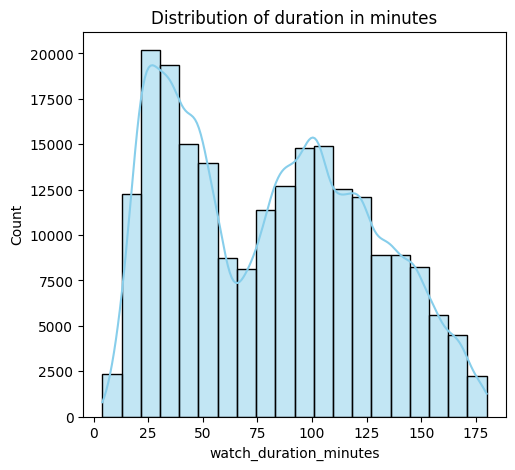

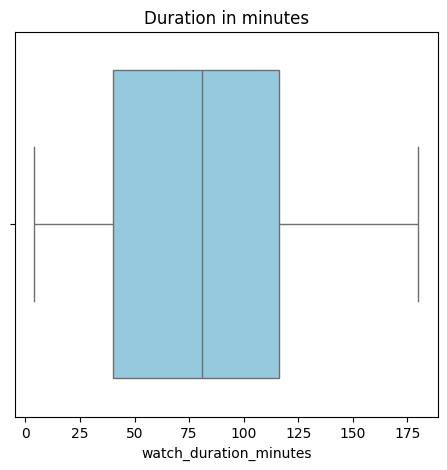

In [35]:
# Histograms to see distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_normal_viewing['watch_duration_minutes'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of duration in minutes")

plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_normal_viewing['watch_duration_minutes'], color="skyblue")
plt.title("Duration in minutes")

plt.show()

#### completion_percentage column

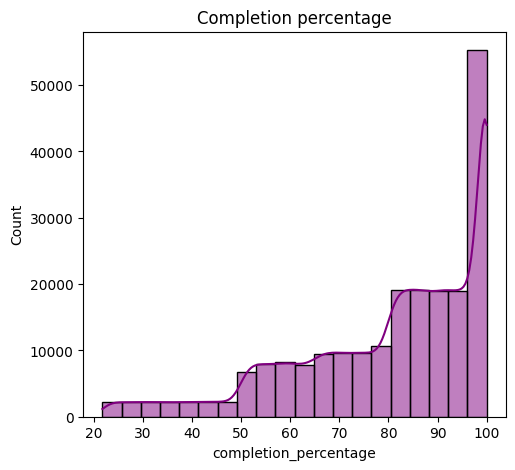

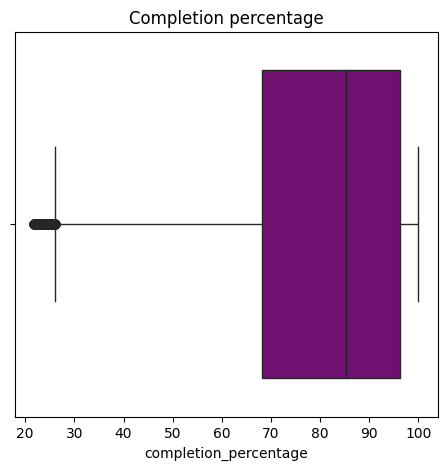

In [36]:
# Histograms to see distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df_normal_viewing['completion_percentage'], bins=20, kde=True, color="purple")
plt.title("Completion percentage")

plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df_normal_viewing['completion_percentage'], color="purple")
plt.title("Completion percentage")

plt.show()

In [37]:
# Check for any remaining values outside the limits
col = "completion_percentage"

aun_outliers = df_normal_viewing[(df_normal_viewing[col] < lower_bound) | (df_normal_viewing[col] > upper_bound)]
if aun_outliers.empty:
    print("\nNo outliers according to the IQR method")
else:
    print("\n There are still outliers detected:", aun_outliers.shape[0])


No outliers according to the IQR method


The df_normal_viewing dataframe is now free of outliers, and the data can be used for its respective analysis. Furthermore, the df_viewing_outlier dataframe was saved, which contains only the rows that were considered outliers. These were not removed because they can provide valuable insight into the behavior of that sample.